# DQN　ロギングエラーチェック


<div class="notebook-data">
<div class="author">Ogawa</div>
<div class="company">GRID</div>
<div class="date">2019/1/31</div>
<div class="description">
</div>
</div>

## Conclusion

DQN logger successful.

## Environment


In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

import renom as rm
from renom_rl.discrete.dqn import DQN
from renom_rl.environ.env import BaseEnv
from renom_rl.utility import Animation
from renom_rl.utility.logger import Logger,DQNLogger

env = gym.make('CartPole-v0')


class CustomEnv(BaseEnv):
    
    def __init__(self, env):
        #required variables
        self.action_shape = (2,)
        self.state_shape = (4,)
        
        #custom variables
        self.env=env
        self.step_continue=0
        self.animation=Animation()
        

    # required function
    def reset(self):
        self.step_continue=0
        return self.env.reset()
        
    
    def sample(self):
        rand=self.env.action_space.sample()
        return rand
    
    def step(self, action):
        state,_,terminal,_=self.env.step(int(action))

        self.step_continue+=1
        reward=0
        
        if terminal:
            if self.step_continue >= 200:
                reward=1
            else:
                reward=-1
#             reward = self.step_continue/100
        
        return state, reward, terminal

    # test function
    def test_start(self):
#         self.animation.reset()
        pass

    def test_epoch_step(self):
#         self.animation.store(self.env.render(mode="rgb_array"))
        pass

    def test_close(self):
#         self.env.close()
         pass

    # custom functions
    def play(self):
        self.animation.run()
    
            
custom_env = CustomEnv(env)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


/Users/mikeogawa/gym/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/Users/mikeogawa/gym/gym/__init__.py:22: UserWarning: DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.
  warnings.warn('DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.')


## Agent

In [2]:
q_network = rm.Sequential([rm.Dense(30, ignore_bias=True),
                           rm.Relu(),
                           rm.Dense(30, ignore_bias=True),
                           rm.Relu(),
                           rm.Dense(custom_env.action_shape[0], ignore_bias=True)])

## Error

In [3]:
try:
    logger=DQNLogger(["aaaa"])
    model = DQN(custom_env, q_network,logger=logger)
except Exception as e:
    print(e)

aaaa does not exist as logging key in this module. Reset log_key.


In [4]:
try:
    logger = DQNLogger(["reward"])
    model = DQN(custom_env, q_network,logger=logger)
    
    model.logger = DQNLogger(["rew"])
    model.fit()

except Exception as e:
    print(e)

rew does not exist as logging key in this module. Reset log_key.


In [5]:
from renom_rl.utility.logger import AVAILABLE_KEYS
print(AVAILABLE_KEYS["dqn"])

{'logger': ['state', 'action', 'reward', 'terminal', 'next_state', 'total_step', 'epoch_step', 'max_step', 'total_episode', 'epoch_episode', 'steps_per_episode', 'epoch', 'max_epoch', 'loss', 'sum_reward', 'epsilon'], 'logger_epoch': ['total_episode', 'epoch_episode', 'epoch', 'max_epoch', 'test_reward', 'epsilon']}


In [6]:
class Original(Logger):
    def __init__(self):
        super(Original,self).__init__(log_key=["reward","state","steps_per_episode"], log_key_epoch=["epsilon"], record_episode_base=False , show_bar = False)

    def logger(self, **log):

        return "episode: {} the reward: {} state:{}  ".format(log["total_episode"],log["sum_reward"],log["state"])

original_logger=Original()

In [7]:
from renom_rl.utility.filter import EpsilonEIFilter
fil = EpsilonEIFilter(min=0,max=0.5,alpha=0.1)


## Executing Training

In [8]:
## New DQN
model = DQN(custom_env, q_network,logger=original_logger)

model.fit( epoch=2,
            epoch_step=5000,
            random_step=32,
            batch_size=32,
            train_frequency=2,
            update_period=2,
            action_filter=fil,
                  )

-episode: 0 the reward: 0 state:[ 0.02116308 -0.15589004  0.02358977  0.33807696]  

Run random 32 step for storing experiences


-episode: 145 the reward: -1 state:[-0.0317376   0.1678948   0.02013513 -0.18695424]                  
-episode: 199 the reward: 1 state:[-0.02859372 -0.19656395 -0.02435598  0.27987836]                   


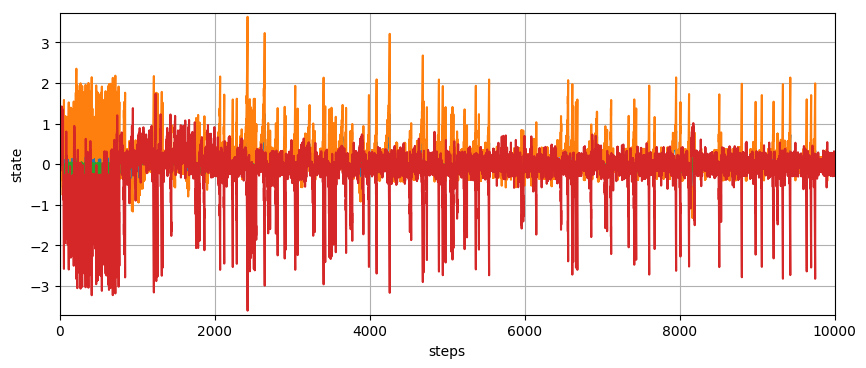

In [9]:
model.logger.graph("state",figsize=(10,4))

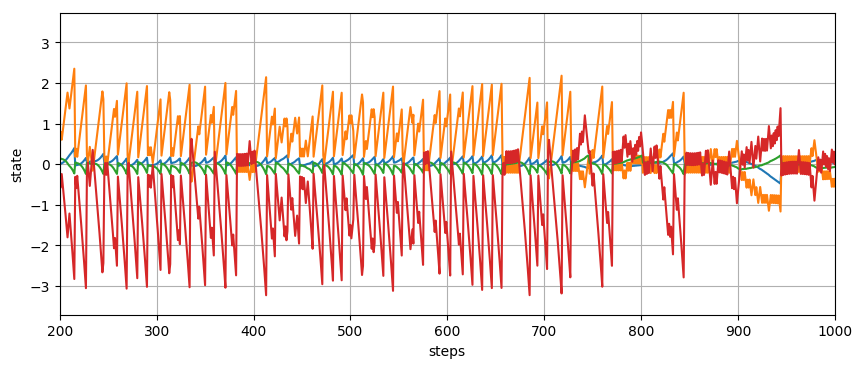

In [10]:
model.logger.graph("state",x_lim=[200,1000],figsize=(10,4))

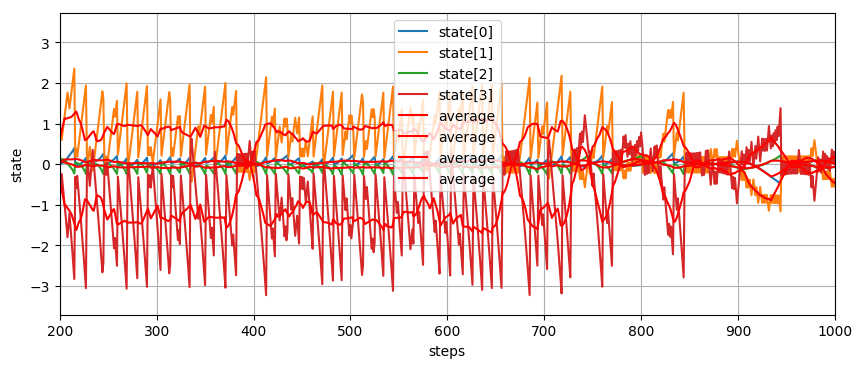

In [11]:
model.logger.graph("state",x_lim=[200,1000],figsize=(10,4),average_range=10)

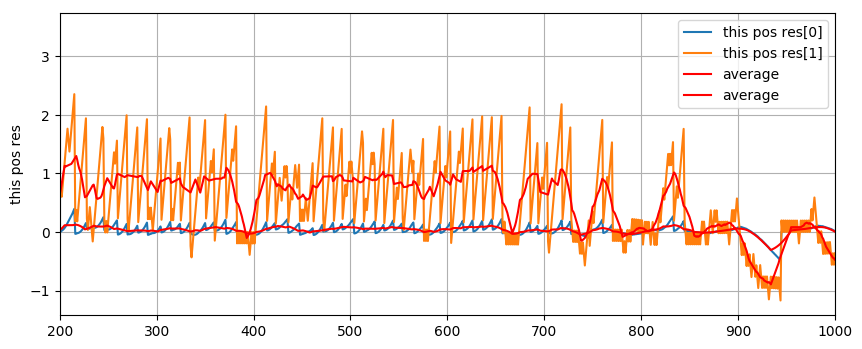

In [12]:
res=model.logger.result("state")
pos_vel=np.array(res["state"])[:,0:2]
model.logger.graph_custom(pos_vel,y_label="this pos res",x_lim=[200,1000],figsize=(10,4),average_range=10)

In [13]:
try:
    res = model.logger.result("state")
    results = np.array(res["state"])
    results=np.random.rand(*results.shape,1)

    model.logger.graph_custom(results,y_label="this pos res",x_lim=[200,1000],figsize=(10,4),average_range=10)
    
except Exception as e:
    print(e)

key dimension conditions are x_data <= 1 and y_data <= 2 when plotting
